# Part 1 of Image Maps: Image Maps - Introduction and Clickable Ideograms

This page is primarily based on the following page at the Circos documentation site:



- [1. Image Maps - Introduction and Clickable Ideograms](????????????)



That page is the first part of the ??? part ['Image Maps' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to the end of the previous section by clicking [here &#8592;](HelperTools_Part7.ipynb).



----



10 --- Image Maps
=================

1. Image Maps - Introduction and Clickable Ideograms
----------------------------------------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/image_maps/ideograms/lesson){.clean}]{.active}
[Images](/documentation/tutorials/image_maps/ideograms/images){.normal}
[Configuration](/documentation/tutorials/image_maps/ideograms/configuration){.normal}
:::

HTML image maps allow you to associate areas of the image with web
links. Any element in the image (ideogram, tick, band, highlight,
ribobn, etc) can have an associated URL. When you publish both the image
and the image map on a web page, the client\'s browser uses the image
map to create clickable regions within the image.

Many of the example images in this tutorial set have image maps. You can
mouse-over these images to see the effect of the map. The links
associated with each element are bogus, though, so don\'t be surprised
if they lead nowhere.

### using image maps

Using client-side image maps is simple, and you can get more information
about image maps
[elsewhere](http://htmlhelp.com/reference/html40/special/map.html).

Briefly, let\'s say you have already created your image,
`circos.png`{.syn-include}, and an image map,
`circos.html`{.syn-include} (I will shortly how the image map is
actually created in Circos). To use the image map, you need to place the
contents of the `circos.html`{.syn-include} file within the web page,
and then use the `USEMAP` attribute in the `IMG` tag to associate the
image with the map.

```ini
<!-- first the contents of the ciros.html file -->
<map name='circosmap'>
<area shape='poly' coords='769,362,778,361,777,348,767,349' ...
<area shape='poly' coords='730,230,738,225,731,213,723,217' ...
...
</map>
<!-- now the image element -->
<img src="circos.png" usemap="#circosmap">
```


As you can see, the image map file is composed of a
[\<map\>]{.syn-block} tag, which has an associated name parameter and,
inside this block, multiple [\<area\>]{.syn-block} tags. Each area tag
defines a clickable area in the image as a rectangle, circle or polygon.

You can include the HTML map into the page using an [server-side include
directive](http://httpd.apache.org/docs/2.0/howto/ssi.html) (if
supported by your web server installation). For dynamic pages, the
script that generates the page would be responsible for injecting the
image map contents into HTML stream.

### preparing to use maps

Parameters that toggle and define image map properties are found in the
\<image\> block of the configuration file. If you set

```ini
<image>
...
image_map_use      = yes
image_map_name     = circosmap
...
</image>
```


you will get an image map written to the same directory as the image
file. The image map file will have the same filename as the image file,
but with an `.html` extension.

Don\'t confuse the map name and filename. The `image_map_name` defines
the name of the map as it appears in the `NAME` tag in the `MAP` element
(this is the same name that is referenced by `USEMAP`). The filename is
the name of the file to which the map is written. Thus, the name and
filename of the map can be different.

Once you\'ve toggled the use of image maps using image\_map\_use, you
still need to define URLs to populate the map. In this tutorial, I will
describe how to associate URLs with ideograms.

### setting image map parameters on the command line

You can override any parameter in the configuration file using the
`-param` command-line flag. If the parameter is inside a block, specify
the block hierarchy and parameter with `/` as delimiter.

```ini
# set value of karyotype parameter in root of configuration
circos -param karyotype=myfile.txt
```


```ini
# set image_map_use parameter in <image> block
circos -param image/image_map_use=yes
```


```ini
# set several parameters in <image> block
circos -param image/image_map_use=yes -param image/image_map_file=myfile.html
```


### making ideograms clickable

Image maps are implemented consistently (at least I\'ve tried to do
this) for all image elements (ideograms, ticks, highlights, ribbons,
etc). The approach to defining and making dynamic URLs of ideograms will
generally apply to all other elements. I will describe how other
elements are made clickable in other tutorials in this section.

To associate a URL with an ideogram, use `ideogram_url` in the
[\<ideogram\>]{.syn-block} block.

```ini
<ideogram>
ideogram_url = http://www.google.com
...
</ideogram>
```


That\'s it. Now, every ideogram in the image (as well as ideogram
labels) will link to www.google.com. This is demonstrated in the first
image of this tutorial.

Note that the `http://` prefix in front of the url makes the url
absolute. If the `http://` were left out, you would get a relative URL.

This is a boring example, because it is unlikely that you would want to
link to the same URL from every ideogram. Let\'s now look at how to make
the URL dynamic.

### dynamic URLs

The `ideogram_url` string can contain fields which refer to properties
of the ideogram. For example,

```ini
ideogram_url = http://www.google.com/search?q=[chr]
```


will result in each ideogram having a unique link because when the URL
is generated for each ideogram, the string `[chr]` will be replaced by
the value of the `chr` parameter for the ideogram. In general, any
string in the url in square brackets will be replaced by the value of
the parameter.

### URL parameters

For ideograms, you have access to the following parameters.

-   chr - name of the ideogram (e.g. hs1)
-   tag - tag of the ideogram (e.g. a, if you\'ve defined a crop like

```ini
hs1\[a\]:0-50)
```


-   label - label of the ideogram (e.g. 1)
-   idx - index of the ideogram (internal value)
-   display\_idx - display index of the ideogram (internal value)
-   start - base position of the start of the ideogram (same as start of

```ini
chromosome, unless the ideogram is a crop)
```


-   end - base position of the end of the ideogram (same as end of

```ini
chromosome, unless the ideogram is a crop)
```


-   chrlength - length of the corresponding chromosome
-   scale - global scale of the ideogram

Each of these can be used any number of times in the URL as
`[parameter_name]`. For example, if you have a script at
`/cgi-bin/script` which understands the CGI parameter named chromosome,
you might use

```ini
ideogram_url = /cgi-bin/script?chromosome=[chr]
```


Each image element (ideogram, tick, highlight, ribbon, etc) will have
its own set of parameters, though many will have a shared set (e.g.
start, end).

In the third example image of this tutorial, I\'ve created an image map
which uses all of the parameters. This is overkill, but you get the
idea.

```ini
ideogram_url = script?type=ideogram&start=[start]&end=[end]
&length=[chrlength]&chr=[chr]&tag=[tag]
&label=[label]&idx=[idx]
&display_idx=[display_idx]&scale=[scale]
```


Notice that this URL is relative (it doesn\'t start with a `/`). Also
notice that I\'ve added a `type=ideogram` parameter pair to the URL -
you can mix static and dynamic parameters to suit your application.

### defining URLs specific to individual ideograms

In the examples above, the `ideogram_url` string was defined in the
configuration file. This definition was applied to each ideogram.
Individual URLs could have dynamic elements, with the use of parameters
described above, but the URL template was the same for each ideogram.

To define URLs specific to individual ideograms you have two options:
including a `url` parameter in the karyotype file or rules. I will cover
rules shortly, but for now let\'s look how the karyotype file can be
used to support URL definitions.

Recall that the karyotype file contains the definitions of each
chromosome and any cytogenetic bands.

```ini
chr - hs1 1 0 247249719 chr1
chr - hs2 2 0 242951149 chr2
chr - hs3 3 0 199501827 chr3
...
```


You can attach a custom URL definition to any chromosome by adding a url
parameter

```ini
chr - hs1 1 0 247249719 chr1 url=special_script?chr=[chr]
chr - hs2 2 0 242951149 chr2 url=another_special_script?chr=[chr]
chr - hs3 3 0 199501827 chr3
...
```


In this case, ideograms for `chr1` and `chr2` will have URLs distinct
from all other ideograms. If you have defined `ideogram_url` in the
configuration file, other chromosomes will have URLs based on this
parameter. If `ideogram_url` is not defined, then only `chr1` and `chr2`
will have URLs.

### incorporating custom tags via id parameter

The `id` parameter, supported by any element, is a useful way to tag
your element with any string. This gives you a way to reference an
element with an identifier that fits your application (e.g. primary key
of a database).

To do so, add the `id` parameter to the karyotype file

```ini
chr - hs1 1 0 247249719 chr1 id=string001,url=special_script?id=[id]&chr=[chr]
chr - hs2 2 0 242951149 chr2 id=string002,url=another_special_script?id=[id]&chr=[chr]
chr - hs3 3 0 199501827 chr3 id=string003
...
```


and, for example, define the `ideogram_url` as

```ini
ideogram_url = script?id=[id]
```


The result will be the same as in the example above, except now the URL
incorporates the id parameter value, which we manually defined for each
chromosome.

### using rules to adjust URLs

It should not surpise you that you can use rules to adjust URL
parameters. Just like adjusting color, stroke, position, or value of a
data point, you can adjust the URL based on a rule.

URLs of any image elements that support rule blocks (plots, links,
highlights) can be manipulated in rules. Ideograms and ticks do not
support rules at this time. I will show an example of rules in a
subsequent tutorial.

### strict image maps --- handling missing parameters

If a url definition uses a parameter which is not defined, then one of
three things happen.

If `image_map_missing_parameter=exit`, then Circos exists with an error
message. This behaviour is useful if you suspect that there\'s an error
in the URL definition, or if you don\'t know whether a parameter is
defined. This setting is draconic but safe.

If `image_map_missing_parameter=removeparam`, the `[parameter_name]`
field will be removed. Any parameters that remain will be used. For
example, if

```ini
url = script?x=[x]&y=[y]
```


and parameter `y` is not defined for an element, the effect will be the
same as if we defined this url for that element.

```ini
url = script?x=[x]&y=
```


Finally, if `image_map_missing_parameter=removeurl`, then the URL is not
used. In other words, the element will not have an entry in the image
map.

### scaling and shifting image maps

The parameters

```ini
<image>
image_map_xshift
image_map_yshift
image_map_xfactor
image_map_yfactor
</image>
```


are used to transform the values of image map coordinates using a
translation and scaling.

The `*shift` values will be added to the `x` (and/or `y`) coordinate of
the map element boundary. These offsets are useful if the Circos image
will be composited with another image, or cropped, or manipulated in any
manner that shifts its original (0,0) (upper left) corner. You can
define one or both values, and they can be negative.

The `*factor` parameter values multiply the `x` (and/or `y`) coordinates
for each map element boundary. These parameters are useful if you are
going to resize the image later. For example, if you create a 3000 x
3000 pixel image `radius=1500px`, but publish a 800 x 800 pixel image,
set both factors to 800/3000 = 2.666667. Unless you are stretching the
image (don\'t do it!) both factors should have the same value.

### debugging image maps

For debugging purposes, you can overlay the image map elements on top of
the PNG image (not SVG). Each element in the overlay can have a fill
color and stroke color. Note that if you add any x/y shift or
multiplicative factors (above) then the overlay will reflect those
factors.

```ini
<image>
image_map_overlay              = yes
image_map_overlay_fill_color   = lred_a4
image_map_overlay_stroke_color = red
image_map_overlay_stroke_thickness = 8
</image>
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/10/1/

/home/jovyan/circos-tutorials-0.67/tutorials/10/1


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.41s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.42s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/10/1
debuggroup summary 0.42s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.42s loading configuration from file circos.conf
debuggroup summary 0.42s found conf file circos.conf
debuggroup summary 0.62s debug will appear for these features: output,summary
debuggroup summary 0.62s bitmap output image ./circos.png
debuggroup summary 0.62s SVG output image ./circos.svg
debuggroup summary 0.62s HTML map file ./circos.html
debuggroup summary 0.62s parsing karyotype and organizing ideograms
debuggroup summary 0.74s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.74s applying global and local scaling
debuggroup summary 0.75s allocating image, colors and brushes
debuggroup summary 3.04s drawing 24 ideograms of total size 3,095,677,436
debuggroup summary 

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Redundant argument in printf at /home/jovyan/circos-0.69-6/bin/../lib/Circos.pm line 3691.
Redundant argument in printf at /home/jovyan/circos-0.69-6/bin/../lib/Circos.pm line 3691.
Redundant argument in printf at /home/jovyan/circos-0.69-6/bin/../lib/Circos.pm line 3691.
Redundant argument in printf at /home/jovyan/circos-0.69-6/bin/../lib/Circos.pm line 3691.
Redundant argument in printf at /home/jovyan/circos-0.69-6/bin/../lib/Circos.pm line 3691.
Redundant argument in printf at /home/jovyan/circos-0.69-6/bin/../lib/Circos.pm line 3691.
Redundant argument in printf at /home/jovyan/circos-0.69-6/bin/../lib/Circos.pm line 3691.
Redundant argument in printf at /home/jovyan/circos-0.69-6/bin/../lib/Circos.pm line 3691.
Redundant argument in printf at /home/jovyan/circos-0.69-6/bin/../lib/Circos.pm line 3691.
Redundant argument in printf at /home/jovyan/circos-0.69-6/

View the plot in this page using the following cell.

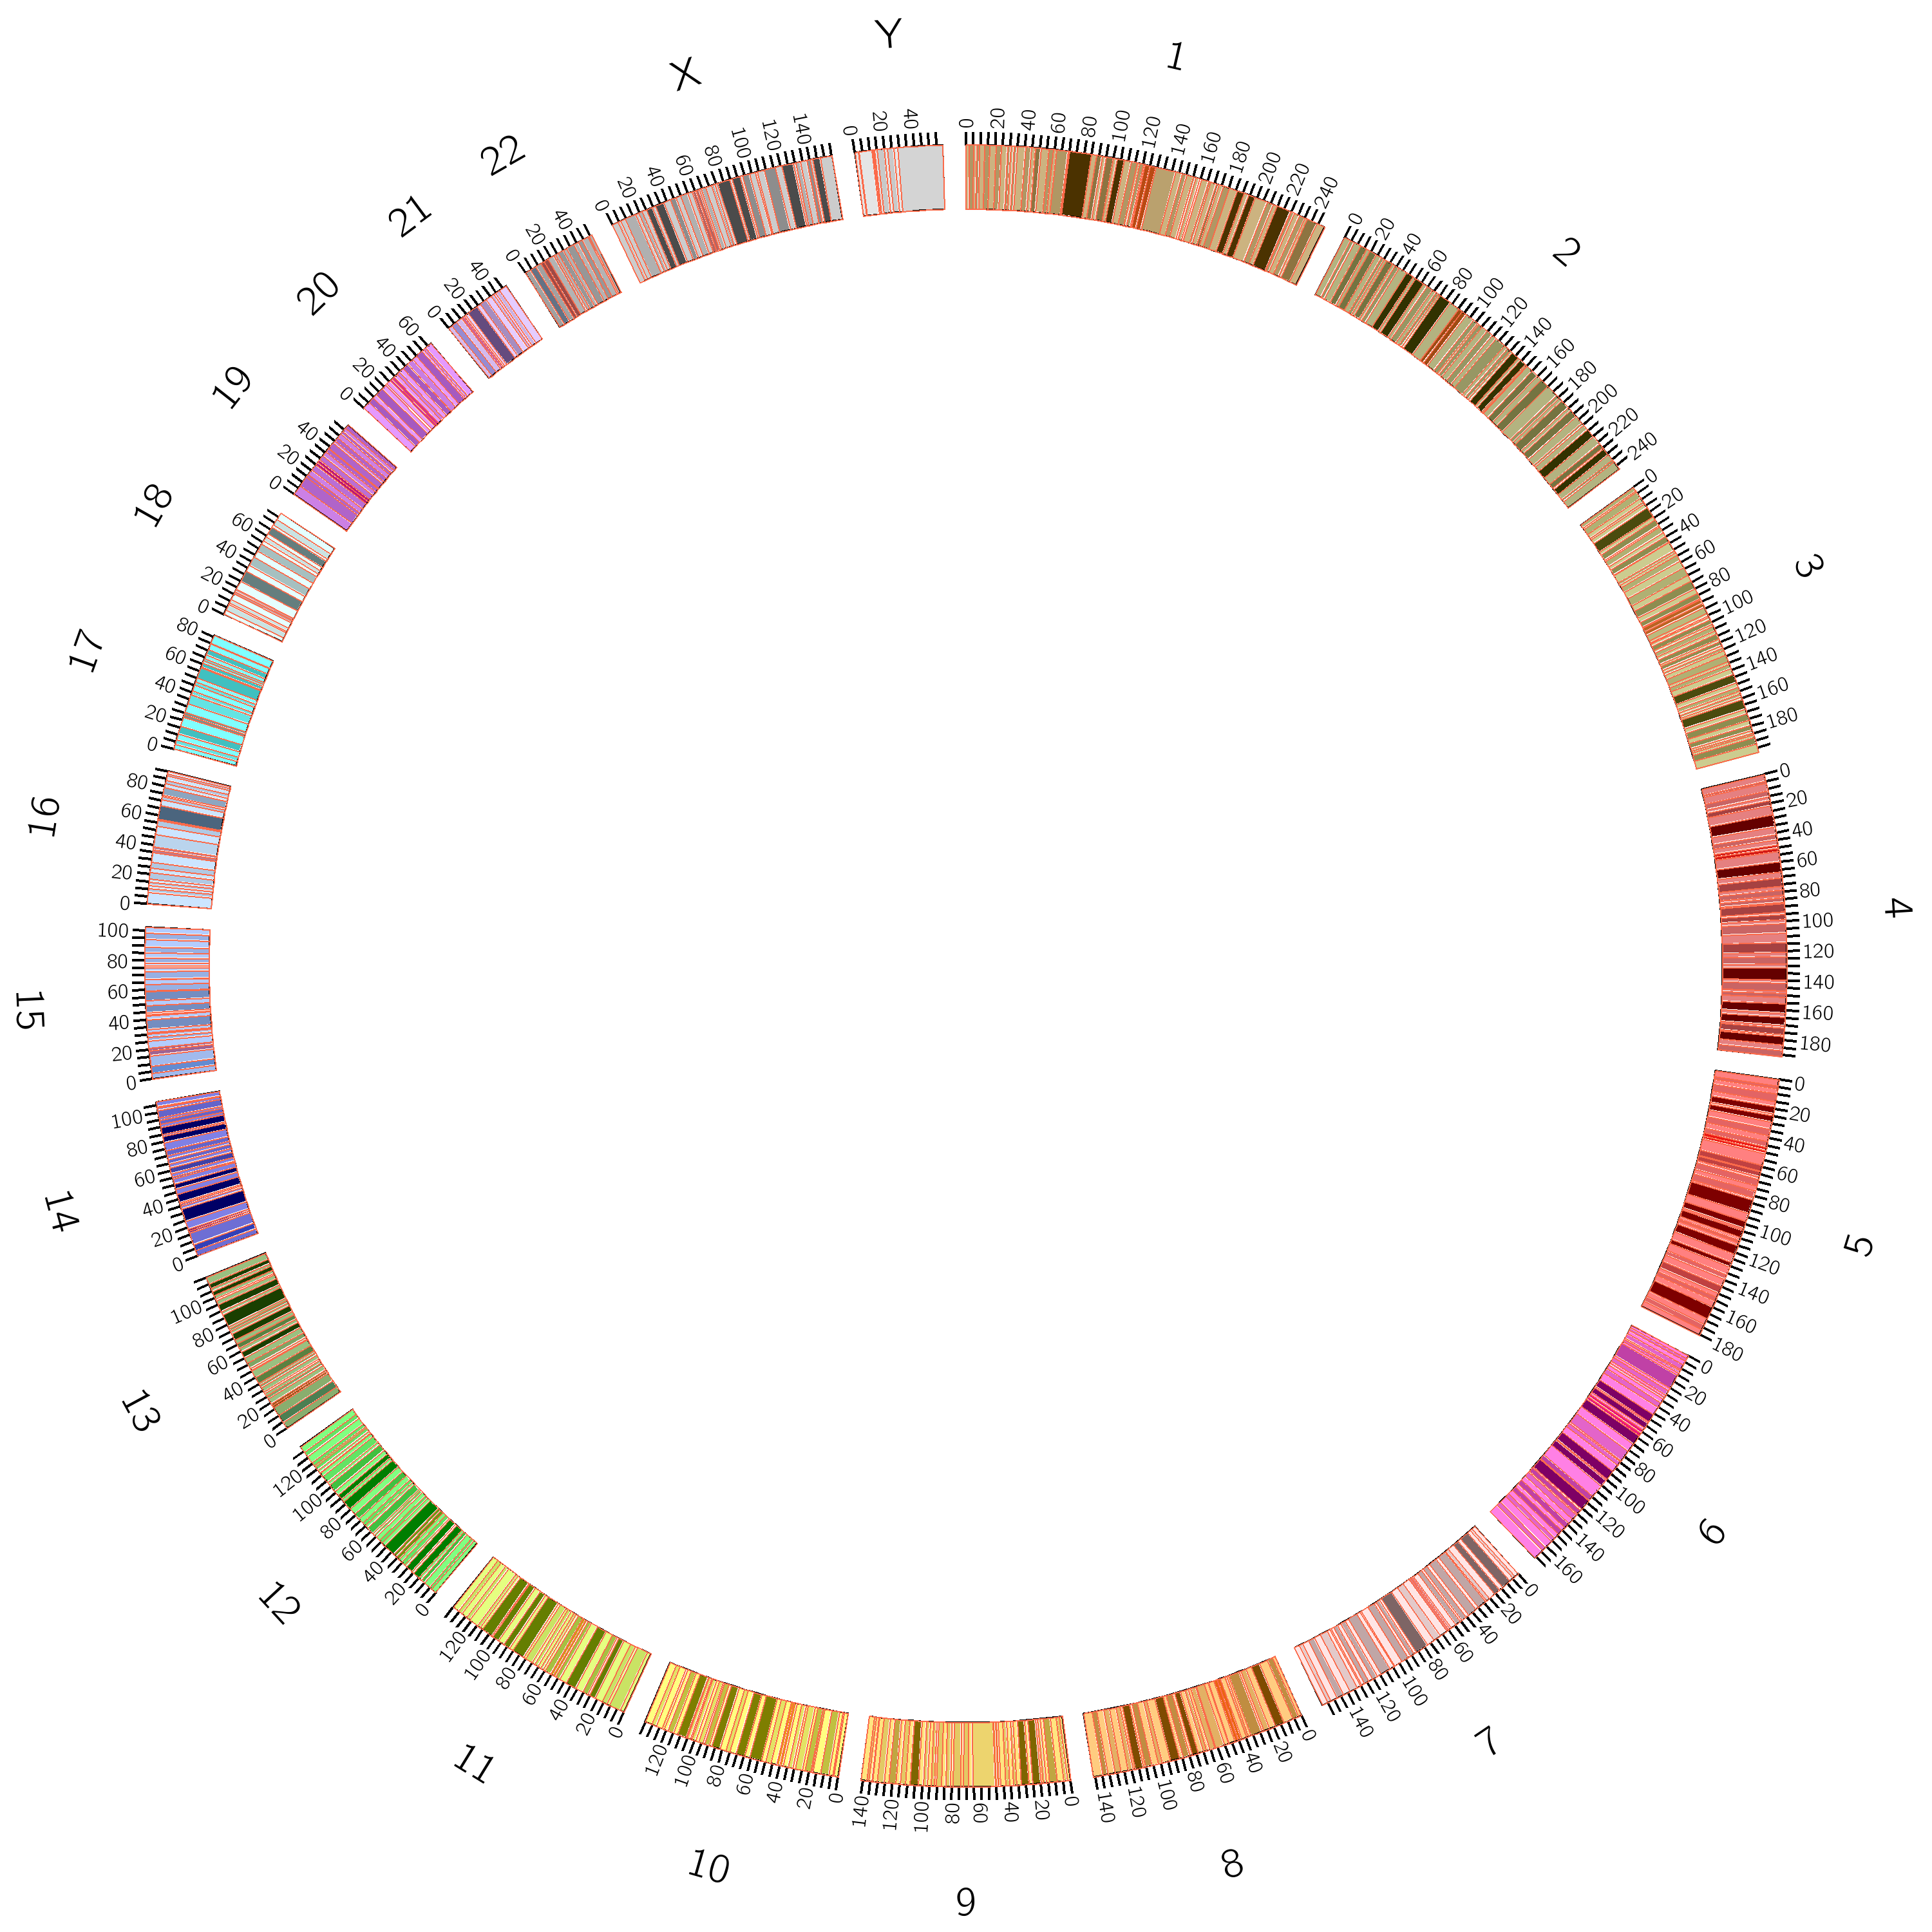

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Image Maps series by clicking [here &#10145;](ImageMaps_Part2.ipynb).

----